In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from time import time
import matplotlib.pyplot as plt

from data_preprocessing import create_datasets
import utils
from models.ResNet import ResNet
import train

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(0))

cuda:0
Quadro GV100


In [2]:
train_ds, valid_ds = create_datasets()

Train set images: 75000
Validation set images: 7500


In [3]:
batch_size = 450*3
num_epochs = 50
max_lr = 0.001

In [4]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=16, pin_memory=True)
val_loader = DataLoader(valid_ds, batch_size*2, num_workers=16, pin_memory=True)

In [5]:
net = ResNet(3, 150)
net = nn.DataParallel(net, device_ids=['cuda:0', 'cuda:1', 'cuda:2'])
net = net.to(device)

In [6]:
utils.test_model(ResNet, input_size=64)

Random batch of size 256 output shape: torch.Size([256, 150])
Forward pass ran in 1.5 seconds


In [7]:
results_1, lrs_1 = train.train_net(net, num_epochs, train_loader, val_loader, max_lr=max_lr, scheduler='one')

Epoch[0] Train_loss: 4.7552  Val_loss: 4.6709	 Train_acc: 0.0250  Val_acc: 0.0469 LR: 0.00005 time: 58.78
Epoch[1] Train_loss: 4.4704  Val_loss: 4.2572	 Train_acc: 0.0538  Val_acc: 0.0834 LR: 0.00008 time: 49.43
Epoch[2] Train_loss: 4.1417  Val_loss: 3.9998	 Train_acc: 0.0826  Val_acc: 0.1182 LR: 0.00013 time: 49.94
Epoch[3] Train_loss: 4.0496  Val_loss: 3.8308	 Train_acc: 0.1133  Val_acc: 0.1452 LR: 0.00020 time: 51.11
Epoch[4] Train_loss: 3.8430  Val_loss: 3.6410	 Train_acc: 0.1363  Val_acc: 0.1735 LR: 0.00028 time: 50.43
Epoch[5] Train_loss: 3.8232  Val_loss: 4.0679	 Train_acc: 0.1560  Val_acc: 0.1214 LR: 0.00037 time: 50.66
Epoch[6] Train_loss: 3.6328  Val_loss: 3.4272	 Train_acc: 0.1560  Val_acc: 0.2165 LR: 0.00047 time: 50.72
Epoch[7] Train_loss: 3.5887  Val_loss: 3.4523	 Train_acc: 0.1963  Val_acc: 0.2146 LR: 0.00057 time: 50.32
Epoch[8] Train_loss: 3.6019  Val_loss: 3.3981	 Train_acc: 0.1872  Val_acc: 0.2199 LR: 0.00067 time: 50.85
Epoch[9] Train_loss: 3.5472  Val_loss: 3.2736	

In [8]:
max_lr = 0.0001
num_epochs = 10
checkpoint = torch.load('./model_weights/model_weights.pth')
net.load_state_dict(checkpoint['model_state_dict'])
results_2, lrs_2 = train.train_net(net, num_epochs, train_loader, val_loader, max_lr=max_lr, scheduler='cos')

Epoch[0] Train_loss: 1.5032  Val_loss: 2.0172	 Train_acc: 0.6122  Val_acc: 0.5213 LR: 0.00010 time: 51.19
Epoch[1] Train_loss: 1.4913  Val_loss: 2.0444	 Train_acc: 0.6302  Val_acc: 0.5125 LR: 0.00009 time: 50.89
Epoch[2] Train_loss: 1.3799  Val_loss: 2.0751	 Train_acc: 0.6363  Val_acc: 0.5165 LR: 0.00008 time: 50.85
Epoch[3] Train_loss: 1.2294  Val_loss: 2.0627	 Train_acc: 0.6416  Val_acc: 0.5141 LR: 0.00007 time: 50.97
Epoch[4] Train_loss: 1.3417  Val_loss: 2.0861	 Train_acc: 0.6498  Val_acc: 0.5201 LR: 0.00005 time: 51.15
Epoch[5] Train_loss: 1.1732  Val_loss: 2.0875	 Train_acc: 0.6570  Val_acc: 0.5198 LR: 0.00003 time: 51.11
Epoch[6] Train_loss: 1.2346  Val_loss: 2.1000	 Train_acc: 0.6642  Val_acc: 0.5204 LR: 0.00002 time: 50.94
Epoch[7] Train_loss: 1.2996  Val_loss: 2.1127	 Train_acc: 0.6682  Val_acc: 0.5214 LR: 0.00001 time: 51.15
Epoch[8] Train_loss: 1.3192  Val_loss: 2.0978	 Train_acc: 0.6729  Val_acc: 0.5226 LR: 0.00000 time: 51.06
Epoch[9] Train_loss: 1.2112  Val_loss: 2.0990	

In [9]:
results = results_1 + results_2
lrs = torch.cat((lrs_1, lrs_2))

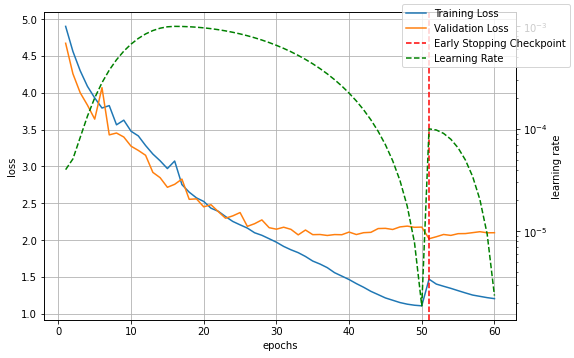

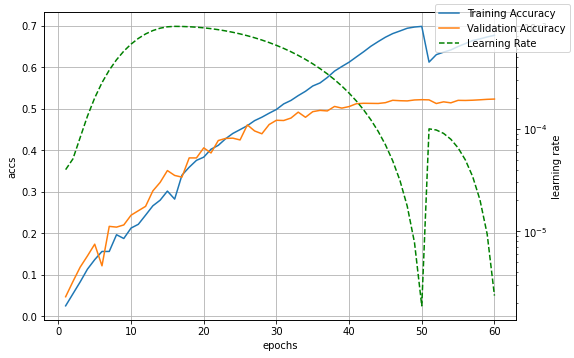

In [10]:
utils.plot_losses(results, lrs, train_loader, figsize=(8, 5))
utils.plot_accuracies(results, lrs, train_loader, figsize=(8, 5))